In [1]:
import os
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()
%matplotlib inline

In [2]:
all_data=[]
for file in os.listdir('data'):
    with open(os.path.join('data',file),encoding='utf-8') as f:
        for line in f:
            data=json.loads(line)
            data['rating']=float(data['rating'])
            data['company']=file.replace('.txt','')
            data['datePosted']=datetime.strptime(data['authorInfo'].split('-')[0].strip(), "%d %b %Y")
            data['authorProfession']=data['authorInfo'].split('-')[1]
            all_data.append(data)
df=pd.DataFrame(all_data)
print(df.shape)
df.head()

(103822, 9)


,rating,pros,cons,adviceManagement,authorInfo,authorLocation,company,datePosted,authorProfession
0,5.0,Love the perks of the company,No Cons as such in mind,,20 Jun 2021 - Content Analyst,Bangalore,Amazon,2021-06-20,Content Analyst
1,3.0,"15/hr plus extra shifts, which equates to a hi...","Physically demanding, meaning you can get inju...",,20 Jun 2021 - Associate,"Langhorne, PA",Amazon,2021-06-20,Associate
2,5.0,Good work and life style,Nothing much to mention here,,20 Jun 2021 - Transaction Risk Investigator (T...,Bangalore,Amazon,2021-06-20,Transaction Risk Investigator (TRMS)
3,4.0,Good for developing a strong CV and learning e...,Low salary for the workload and life expenses,,20 Jun 2021 - Account Manager,,Amazon,2021-06-20,Account Manager
4,5.0,Freedom to pick and choose battles,"Huge teams, sometimes it can become ambiguous",,20 Jun 2021 - Designer,New Delhi,Amazon,2021-06-20,Designer


In [3]:
df.pivot_table(values='rating',index='company',aggfunc='count')

,rating
company,
Amazon,72210
Berkshire-Hathaway,593
Blackrock,3073
Cisco-Systems,13838
Facebook,5717
Johnson-and-Johnson,6565
Sony,1826


In [4]:
def apply_sentiment(sentence):
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['compound']

def search_reviews(sWords,matchPhrase=True,ignoreCase=True):
    if matchPhrase==False:
        sWords='|'.join([word for word in sWords.split()])
    df_subset=df[(df['pros'].str.contains(sWords,case=ignoreCase)==True)|(df['cons'].str.contains(sWords,case=ignoreCase)==True)].copy()
    df_subset['proSentiment']=df_subset['pros'].apply(lambda x:apply_sentiment(x))
    df_subset['conSentiment']=df_subset['cons'].apply(lambda x:apply_sentiment(x))
    return df_subset

In [5]:
words='diversity'
df_temp=search_reviews(words,matchPhrase=False,ignoreCase=True)
df_temp.sort_values(by=['proSentiment'],ascending=False,inplace=True)
df_temp.head()

,rating,pros,cons,adviceManagement,authorInfo,authorLocation,company,datePosted,authorProfession,proSentiment,conSentiment
48507,5.0,The Amazon corporate culture/values are the be...,We provide stock to all Amazon employees at al...,,30 Aug 2018 - Senior Learning and Talent Devel...,"Redwood Shores, CA",Amazon,2018-08-30,Senior Learning and Talent Development Specia...,0.9995,0.9614
45737,4.0,Amazon is a company where the diversity of bus...,Some managers aren't great at developing peopl...,,7 Jan 2019 - Manager Finance,"Seattle, WA",Amazon,2019-01-07,Manager Finance,0.9984,0.9520
74311,3.0,•\tYou can achieve huge impact. With enough ef...,"•\tScrewed up incentives. In general, people a...",,7 Jul 2018 - Associate,Budapest,Blackrock,2018-07-07,Associate,0.9977,0.9952
80240,5.0,Cisco is a great company! I have worked at man...,"If you are not accustomed to change, you may h...",,30 Nov 2018 - Systems Engineering Manager,"Atlanta, GA",Cisco-Systems,2018-11-30,Systems Engineering Manager,0.9976,0.8777
52347,5.0,"I have worked for 4 years in the company, and ...","Prague’s office is relatively new for Amazon, ...",,8 Mar 2018 - Anonymous Employee,Prague,Amazon,2018-03-08,Anonymous Employee,0.9975,0.8724


In [11]:
item=df_temp.iloc[0]
print("Company: "+ item['company'])
print("Rating: "+str(item['rating']))
print("Date Posted: "+datetime.strftime(item['datePosted'],'%d-%b-%Y'))
print("Pros sentiment score: "+str(item['proSentiment']))
print("_____________________________________________________________________")
print(item['pros'])
print("_____________________________________________________________________")
print(item['cons'])

Company: Blackrock
Rating: 3.0
Date Posted: 01-Nov-2014
Pros sentiment score: 0.9857
_____________________________________________________________________
1)  Smart, friendly and talented employees.  There are some incompetent people that need to be managed out, but that's been true at all firms where I've worked.
2)  Approachable senior management.   I don't hold a position that will ever command any special treatment, but I don't find it difficult to get access to senior managers if/when I need it.
3)  Respect for diversity - at least in the San Francisco office.  I can't speak for the other locations.
4)  Focus on community engagement.  The San Francisco office is very civic-minded.
5)  Decent benefits.  No, this isn't Salesforce or Google, but benefits aren't bad by any means.
_____________________________________________________________________
1) Non-existent work-life balance.  There are a handful of people who mysteriously manage to keep to an 8 hour schedule.  For the rest of 

In [12]:
item=df_temp.iloc[1]
print("Company: "+ item['company'])
print("Rating: "+str(item['rating']))
print("Date Posted: "+datetime.strftime(item['datePosted'],'%d-%b-%Y'))
print("Pros sentiment score: "+str(item['proSentiment']))
print("_____________________________________________________________________")
print(item['pros'])
print("_____________________________________________________________________")
print(item['cons'])

Company: Blackrock
Rating: 5.0
Date Posted: 08-Jan-2021
Pros sentiment score: 0.9816
_____________________________________________________________________
Fast paced company. Working at BlackRock is similar to parenthood as every time you adjust to the new routine, something changes. Change is the constant. So if you don't like to re-invent yourself and being constantly increasing your skillset, this is not the company for you. I am very proud of working at BlackRock due to its principles and core values. If you work at BlackRock, the -fiduciary to our clients- principle is embedded in our DNA and helps us make the best decisions at a set point in time. Instead of comparing ourselves against our competitors , we are always striving to be better for our clients, enhance local and global standards and increase them in order to provide the best solutions for our clients. I've seen again and again how we are trendsetters (e.g., managing active & passive investing in one firm, ESG investing

In [13]:
item=df_temp.iloc[2]
print("Company: "+ item['company'])
print("Rating: "+str(item['rating']))
print("Date Posted: "+datetime.strftime(item['datePosted'],'%d-%b-%Y'))
print("Pros sentiment score: "+str(item['proSentiment']))
print("_____________________________________________________________________")
print(item['pros'])
print("_____________________________________________________________________")
print(item['cons'])

Company: Blackrock
Rating: 4.0
Date Posted: 11-May-2019
Pros sentiment score: 0.9774
_____________________________________________________________________
Blackrock puts great emphasis on building company culture and training its employees. The athmosphere is built on inclusion and diversity and it is not just some meaningless headline, the company is really strong in these fields. People are welcoming and helpful, which makes its much easier to get past the first few months and become a dedicated member of the team. There is quite a long period of training for new joiners, tech conferences and a wide variety of trainings  are available later as well for employees. Blackrock is a very good place for starting a carrier in software.
_____________________________________________________________________
Blackrock on the other hand is very much what people usually expect from a big multinational corporation, processes can be sluggish and inflexible. Lots of things are governed from above an

In [122]:
from gensim.models import Word2Vec 
model = Word2Vec.load("word2vec.model_50_3_1")

In [134]:
from collections import defaultdict
all_dict=defaultdict(int)
all_dict['diversity']+=1
items=model.wv.most_similar('diversity', topn=5)
for item in items:
    print('diversity',item[0],item[1])
    all_dict[item[0]]+=1

diversity inclusion 0.7531678676605225
diversity teamwork 0.7366514205932617
diversity empowerment 0.7191998362541199
diversity transparency 0.7103386521339417
diversity professionalism 0.7089841961860657


In [148]:
for item in items:
    for subitem in model.wv.most_similar(item[0], topn=5):
        print("("+item[0]+")-[:connects_in {similarity: " + str(subitem[1])+"}]->("+subitem[0]+"),")
        all_dict[subitem[0]]+=1

(inclusion)-[:connects_in {similarity: 0.8115523457527161}]->(openness),
(inclusion)-[:connects_in {similarity: 0.7531679272651672}]->(diversity),
(inclusion)-[:connects_in {similarity: 0.74532151222229}]->(empowerment),
(inclusion)-[:connects_in {similarity: 0.7434853315353394}]->(cultural),
(inclusion)-[:connects_in {similarity: 0.7278541922569275}]->(inexcusable),
(teamwork)-[:connects_in {similarity: 0.7909926772117615}]->(collaboration),
(teamwork)-[:connects_in {similarity: 0.7366513609886169}]->(diversity),
(teamwork)-[:connects_in {similarity: 0.6929837465286255}]->(inclusion),
(teamwork)-[:connects_in {similarity: 0.6894316673278809}]->(empowerment),
(teamwork)-[:connects_in {similarity: 0.6848162412643433}]->(camaraderie),
(empowerment)-[:connects_in {similarity: 0.781296968460083}]->(openness),
(empowerment)-[:connects_in {similarity: 0.7453756928443909}]->(engagement),
(empowerment)-[:connects_in {similarity: 0.74532151222229}]->(inclusion),
(empowerment)-[:connects_in {sim

In [136]:
for item in all_dict:
    print(item)

diversity
inclusion
teamwork
empowerment
transparency
professionalism
openness
cultural
inexcusable
collaboration
camaraderie
engagement
involvement
accountability
consistency
empathy
oversight
integrity
re-abuse


In [7]:
# import the neo4j driver for Python
from neo4j import GraphDatabase
# Database Credentials
uri             = "bolt://localhost:7687"
userName        = "neo4j"
password        = "Qwerty12$"

# Connect to the neo4j database server
graphDB_Driver  = GraphDatabase.driver(uri, auth=(userName, password))

# CQL to query all the universities present in the graph
cqlNodeQuery          = "MATCH (x:word) RETURN x"

# CQL to query the distances from Yale to some of the other Ivy League universities
cqlEdgeQuery          = "MATCH (x:word {name:'diversity'})-[r]->(y:word) RETURN y.name,r.similarity"

# CQL to create a graph containing some of the Ivy League universities
cqlCreate = """CREATE
(diversity:Word { name: "diversity"}),
(inclusion:Word { name: "inclusion"}),
(teamwork:Word { name: "teamwork"}),
(empowerment:Word { name: "empowerment"}),
(transparency:Word { name: "transparency"}),
(professionalism:Word { name: "professionalism"}),
(openness:Word { name: "openness"}),
(cultural:Word { name: "cultural"}),
(inexcusable:Word { name: "inexcusable"}),
(collaboration:Word { name: "collaboration"}),
(camaraderie:Word { name: "camaraderie"}),
(engagement:Word { name: "engagement"}),
(involvement:Word { name: "involvement"}),
(accountability:Word { name: "accountability"}),
(consistency:Word { name: "consistency"}),
(empathy:Word { name: "empathy"}),
(oversight:Word { name: "oversight"}),
(integrity:Word { name: "integrity"}),
(reabuse:Word { name: "re-abuse"}),
(diversity)-[:similar {similarity: 0.7531678676605225, empty: ''}]->(inclusion),
(diversity)-[:similar {similarity: 0.7366514205932617, empty: ''}]->(teamwork),
(diversity)-[:similar {similarity: 0.7191998362541199, empty: ''}]->(empowerment),
(diversity)-[:similar {similarity: 0.7103386521339417, empty: ''}]->(transparency),
(diversity)-[:similar {similarity: 0.7089841961860657, empty: ''}]->(professionalism),
(inclusion)-[:similar {similarity: 0.8115523457527161, empty: ''}]->(openness),
(inclusion)-[:similar {similarity: 0.7531679272651672, empty: ''}]->(diversity),
(inclusion)-[:similar {similarity: 0.74532151222229, empty: ''}]->(empowerment),
(inclusion)-[:similar {similarity: 0.7434853315353394, empty: ''}]->(cultural),
(inclusion)-[:similar {similarity: 0.7278541922569275, empty: ''}]->(inexcusable),
(teamwork)-[:similar {similarity: 0.7909926772117615, empty: ''}]->(collaboration),
(teamwork)-[:similar {similarity: 0.7366513609886169, empty: ''}]->(diversity),
(teamwork)-[:similar {similarity: 0.6929837465286255, empty: ''}]->(inclusion),
(teamwork)-[:similar {similarity: 0.6894316673278809, empty: ''}]->(empowerment),
(teamwork)-[:similar {similarity: 0.6848162412643433, empty: ''}]->(camaraderie),
(empowerment)-[:similar {similarity: 0.781296968460083, empty: ''}]->(openness),
(empowerment)-[:similar {similarity: 0.7453756928443909, empty: ''}]->(engagement),
(empowerment)-[:similar {similarity: 0.74532151222229, empty: ''}]->(inclusion),
(empowerment)-[:similar {similarity: 0.7306003570556641, empty: ''}]->(professionalism),
(empowerment)-[:similar {similarity: 0.7247522473335266, empty: ''}]->(involvement),
(transparency)-[:similar {similarity: 0.8204188942909241, empty: ''}]->(accountability),
(transparency)-[:similar {similarity: 0.8195109367370605, empty: ''}]->(consistency),
(transparency)-[:similar {similarity: 0.7984603643417358, empty: ''}]->(empathy),
(transparency)-[:similar {similarity: 0.7959545254707336, empty: ''}]->(oversight),
(transparency)-[:similar {similarity: 0.7780358791351318, empty: ''}]->(professionalism),
(professionalism)-[:similar {similarity: 0.793596088886261, empty: ''}]->(empathy),
(professionalism)-[:similar {similarity: 0.7780358791351318, empty: ''}]->(transparency),
(professionalism)-[:similar {similarity: 0.7540795207023621, empty: ''}]->(accountability),
(professionalism)-[:similar {similarity: 0.734505295753479, empty: ''}]->(integrity),
(professionalism)-[:similar {similarity: 0.730879008769989, empty: ''}]->(reabuse)
"""

# Execute the CQL query
with graphDB_Driver.session() as graphDB_Session:
    # Create nodes
    graphDB_Session.run(cqlCreate)
    # Query the graph    
    nodes = graphDB_Session.run(cqlNodeQuery)
   
    print("List of Ivy League universities present in the graph:")

    for node in nodes:
        print(node)

    # Query the relationships present in the graph

    nodes = graphDB_Session.run(cqlEdgeQuery)
    print("Distance from Yale University to the other Ivy League universities present in the graph:")
    for node in nodes:
        print(node)

List of Ivy League universities present in the graph:
Distance from Yale University to the other Ivy League universities present in the graph:


In [200]:
df_temp=df[df['company']=='Sony'].copy()
df_temp['proSentiment']=df_temp['pros'].apply(lambda x:apply_sentiment(x))
df_temp['conSentiment']=df_temp['cons'].apply(lambda x:apply_sentiment(x))
df_temp.head()

,rating,pros,cons,adviceManagement,authorInfo,authorLocation,company,datePosted,authorProfession,proSentiment,conSentiment
101996,5.0,Great opportunity for career up,Japanese culture & sometime decision moving slow,,12 Aug 2019 - Senior Manager,Hong Kong,Sony,2019-08-12,Senior Manager,0.7845,0.0000
101997,2.0,Friendly colleagues and that’s all,"Low salary, uncleared career path",,25 Mar 2021 - Marketing Officer,Kon Hang,Sony,2021-03-25,Marketing Officer,0.4939,-0.2732
101998,3.0,"Good paid, free all the time",Long working around nine hrs working,,25 Mar 2021 - Undergraduate Student,Hong Kong,Sony,2021-03-25,Undergraduate Student,0.7351,0.0000
101999,2.0,"good food, the community is also quite united",salary is low and bad English of workers,,10 Mar 2021 - Web Developer,,Sony,2021-03-10,Web Developer,0.7178,-0.6808
102000,5.0,Nothing mych to tell about,Nothing muvjNothing mych to tell about,,2 Jul 2019 - Anonymous Employee,,Sony,2019-07-02,Anonymous Employee,0.0000,0.0000


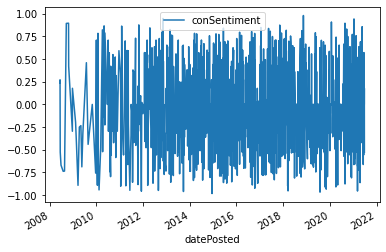

In [203]:
df_temp.plot(x="datePosted", y="conSentiment");

datetime.datetime(2014, 11, 2, 0, 0)